In [37]:
INPUT_DATAPATH = "/home/karthikeya/ProjectsSJSU/ML_Project/Data" #path to store files based on search term
SEARCH_TERM = "NarendraModi"
TWEETS_COUNT = 300
TIME_LIMIT = 5

 
consumer_key = 'HImrEBDPQ1v30Ms8yevMAtOc2'
consumer_secret = 'hwmtGELZmLXHAaV1Xok9lkUjNjB3n3fu8SMvnGJv1ofnfMKqd0'
access_token = '354844313-ITXlT4314nPV3WxXjEcgq5xlVecRgK2KItdTjkJV'
access_secret = 'rBvKgdyZaOgcMj5xULpTYZfWaLjlm4wH3qbcUSwJf65tq'


import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [38]:
# Searches user_timeline, selects 10 tweets and puts that into dataframe
#later few parts of data we are interested in is fed into respective arrays
# mean length of tweets is calculated

tweets = api.user_timeline(screen_name=SEARCH_TERM, count=TWEETS_COUNT)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

print(dir(tweets[0]))

# We display the first 10 elements of the dataframe:
display(data.head(10))

data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

display(data.head(10))

mean = np.mean(data['len'])
print("The lenght's average in tweets: {}".format(mean))

Number of tweets extracted: 200.

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


,Tweets
0,We will also review the developments in India-...
1,President Xi and I will exchange views on a ra...
2,"I will be visiting Wuhan, China on 27-28 April..."
3,Our priority for Karnataka is more prosperity ...
4,"Congress knows it is not winning in Karnataka,..."
5,"Agenda of @BJP4Karnataka is development, fast-..."
6,Had an extensive interaction with @BJP4Karnata...
7,Looking forward to interacting with all candid...
8,In line with our work towards creating top qua...
9,"During the Pragati session today, we reviewed ..."


,Tweets,len,ID,Date,Source,Likes,RTs
0,We will also review the developments in India-...,105,989437529773375488,2018-04-26 09:34:24,Twitter Web Client,5184,1255
1,President Xi and I will exchange views on a ra...,140,989437528070438912,2018-04-26 09:34:24,Twitter Web Client,5124,1272
2,"I will be visiting Wuhan, China on 27-28 April...",140,989437526497607681,2018-04-26 09:34:23,Twitter Web Client,8979,1833
3,Our priority for Karnataka is more prosperity ...,140,989436707241058304,2018-04-26 09:31:08,Twitter Web Client,10178,2513
4,"Congress knows it is not winning in Karnataka,...",140,989436545605156864,2018-04-26 09:30:29,Twitter Web Client,21578,5761
5,"Agenda of @BJP4Karnataka is development, fast-...",140,989436189781327872,2018-04-26 09:29:05,Twitter Web Client,6694,1962
6,Had an extensive interaction with @BJP4Karnata...,140,989435954455760896,2018-04-26 09:28:09,Twitter Web Client,6040,1625
7,Looking forward to interacting with all candid...,135,989330981642493953,2018-04-26 02:31:01,Twitter for iPhone,7686,1753
8,In line with our work towards creating top qua...,140,989151747510685696,2018-04-25 14:38:48,Twitter Web Client,14510,3241
9,"During the Pragati session today, we reviewed ...",140,989151470300774400,2018-04-25 14:37:42,Twitter Web Client,7026,1665


The lenght's average in tweets: 129.72


The tweet with more likes is: 
भारत सरकार ने बेटियों के साथ दुर्व्यवहार करने वाले राक्षसी मनोवृत्ति के लोगों को फांसी पर लटकाने का कानून बनाया है। https://t.co/KS5eblto9i
Number of likes: 31538
139 characters.

The tweet with more retweets is: 
भारत सरकार ने बेटियों के साथ दुर्व्यवहार करने वाले राक्षसी मनोवृत्ति के लोगों को फांसी पर लटकाने का कानून बनाया है। https://t.co/KS5eblto9i
Number of retweets: 7197
139 characters.



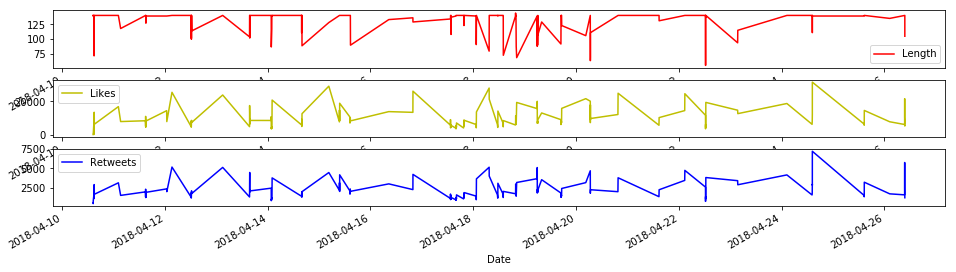

In [39]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])



%matplotlib inline
#plt.subplot(sharex=True, sharey=False)
plt.subplot(311)
tlen.plot(figsize=(16,4), label="Length", color='r', legend=True);
plt.subplot(312)
tfav.plot(figsize=(16,4), label="Likes", color='y', legend=True);
plt.subplot(313)
tret.plot(figsize=(16,4), label="Retweets", color='b', legend=True);




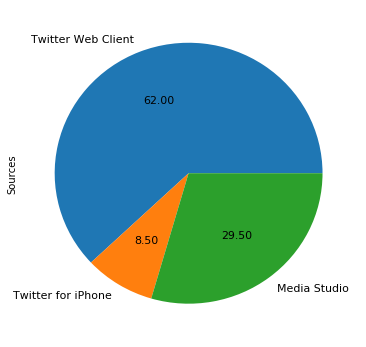

In [40]:

sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)


percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [41]:
import re
from textblob import TextBlob


def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
    

# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,We will also review the developments in India-...,105,989437529773375488,2018-04-26 09:34:24,Twitter Web Client,5184,1255,-1
1,President Xi and I will exchange views on a ra...,140,989437528070438912,2018-04-26 09:34:24,Twitter Web Client,5124,1272,0
2,"I will be visiting Wuhan, China on 27-28 April...",140,989437526497607681,2018-04-26 09:34:23,Twitter Web Client,8979,1833,0
3,Our priority for Karnataka is more prosperity ...,140,989436707241058304,2018-04-26 09:31:08,Twitter Web Client,10178,2513,1
4,"Congress knows it is not winning in Karnataka,...",140,989436545605156864,2018-04-26 09:30:29,Twitter Web Client,21578,5761,-1
5,"Agenda of @BJP4Karnataka is development, fast-...",140,989436189781327872,2018-04-26 09:29:05,Twitter Web Client,6694,1962,0
6,Had an extensive interaction with @BJP4Karnata...,140,989435954455760896,2018-04-26 09:28:09,Twitter Web Client,6040,1625,1
7,Looking forward to interacting with all candid...,135,989330981642493953,2018-04-26 02:31:01,Twitter for iPhone,7686,1753,0
8,In line with our work towards creating top qua...,140,989151747510685696,2018-04-25 14:38:48,Twitter Web Client,14510,3241,1
9,"During the Pragati session today, we reviewed ...",140,989151470300774400,2018-04-25 14:37:42,Twitter Web Client,7026,1665,0


Percentage of positive tweets: 42.0%
Percentage of neutral tweets: 53.0%
Percentage de negative tweets: 5.0%


In [42]:
# Before running this code
# make a directory named Data and provide the path of the directory at INPUT_DATAPATH
# set SEARCH_TERM as what you would like to search from twitter "ex: apple"
# which would produce the list of tweets for the term "apple" 
# and also store the twitter data into the file stream_apple.json in the directory of INPUT_DATAPATH


from tweepy import Stream
from tweepy.streaming import StreamListener
import time
import string
import json
import time
import os


class MyListener(StreamListener):
    """Custom StreamListener for streaming data."""

    def __init__(self, data_dir, query, time_limit):
        query_fname = ''.join(convert_valid(one_char) for one_char in query)
        self.start_time = time.time()
        self.limit = TIME_LIMIT
        self.outfile = "%s/stream_%s.json" % (data_dir, query_fname)
        
    def on_data(self, data):
      # removes if a file already exists with same name and creates new file and writes into that
    
        if os.path.exists(self.outfile): os.remove(self.outfile)
        with open(self.outfile,'a') as f:
            try:
                f.write(data)
                print(data)

                if (time.time() - self.start_time) > self.limit:
                    #f.write('WRITE COMPLETE')
                    print('WRITE COMPLETE')
                    time.sleep(1)
                    f.close()
                    return False
                return True

            except BaseException as e:
                print("Error on_data: %s" % str(e))
                time.sleep(5)


    def on_error(self, status):
        print(status)
        return True

    
def convert_valid(one_char):
    """Convert a character into '_' if invalid.
    Arguments:
        one_char -- the char to convert
    Return:
        Character -- converted char
    """
    valid_chars = "-_.%s%s" % (string.ascii_letters, string.digits)
    if one_char in valid_chars:
        return one_char
    else:
        return '_'
 
'''
def format_filename(fname):
    """Convert file name into a safe string.
    Arguments:
        fname -- the file name to convert
    Return:
        String -- converted file name
    """
    return ''.join(convert_valid(one_char) for one_char in fname)
'''

'''
@classmethod
def parse(cls, api, raw):
    status = cls.first_parse(api, raw)
    setattr(status, 'json', json.dumps(raw))
    return status
'''

"\n@classmethod\ndef parse(cls, api, raw):\n    status = cls.first_parse(api, raw)\n    setattr(status, 'json', json.dumps(raw))\n    return status\n"

In [43]:
twitter_stream = Stream(auth, MyListener(INPUT_DATAPATH, SEARCH_TERM, TIME_LIMIT)) #calling stream function to stream in live data
twitter_stream.filter(track=[SEARCH_TERM]) # filters data based on search term on storing

{"created_at":"Fri Apr 27 12:25:33 +0000 2018","id":989842989101928450,"id_str":"989842989101928450","text":"RT @Dippi1122: @rittusharma14 @Lavanya19545283 @Rupali02125815 @Simi80391963 @vikram20745195 @amarjeetsingh41 @86fatimah2015 @MinistryWCD @\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":949540528936243200,"id_str":"949540528936243200","name":"Sujata Amitabh Kamal","screen_name":"Dippi1122","location":"Patna, India","url":null,"description":"Hi","translator_type":"none","protected":false,"verified":false,"followers_count":80,"friends_count":145,"listed_count":0,"favourites_count":4080,"statuses_count":3724,"created_at":"Sat Jan 06 07:17:58 +0000 2018","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":"en"

{"created_at":"Fri Apr 27 12:25:34 +0000 2018","id":989842991119552514,"id_str":"989842991119552514","text":"\u0939\u093f\u0928\u094d\u0926 \u0915\u0940 \u092c\u0947\u091f\u0940 \u092a\u094d\u092f\u093e\u0930\u0940 \u0939\u094b ,\u091a\u093e\u0939\u0947 \u0939\u092e\u093e\u0930\u0940 \u0939\u094b \u092f\u093e \u0924\u0941\u092e\u094d\u0939\u093e\u0930\u0940 \u0939\u094b!!! \n\u0907\u091c\u093c\u094d\u091c\u093c\u0924 \u0932\u0942\u091f\u0928\u0947 \u0935\u093e\u0932\u0947 \u0915\u093e, \u0938\u0930 \u0924\u0928 \u0938\u0947 \u091c\u0941\u0926\u093e \u0939\u094b!!! \n\u092b\u093f\u0930 \u091a\u093e\u0939\u0947 \u0935\u0939\u2026 https:\/\/t.co\/P1FJlB0z4p","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2461967831,"id_str":"246196783

{"created_at":"Fri Apr 27 12:25:36 +0000 2018","id":989843000388870144,"id_str":"989843000388870144","text":"RT @bishodip: Dude: We are ready for more special moment in Nepal. Watch it out. #ModiNotWelcomedInNepal \n#BlockadeWasCrimeMrModi  \nhttps:\/\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1327404582,"id_str":"1327404582","name":"\u0905\u0936\u0941","screen_name":"fusion_ashu","location":"Nepal","url":null,"description":"\u0928\u093e\u092e \u0905\u0936\u0947\u0937 \u0915\u093e\u092e \u0935\u093f\u0936\u0947\u0937 \u092f\u0938\u094d\u0924\u0948 \u091b \u092a\u0930\u093f\u092d\u0947\u0937","translator_type":"none","protected":false,"verified":false,"followers_count":2382,"friends_count":729,"listed_count":10,"favourites

{"created_at":"Fri Apr 27 12:25:36 +0000 2018","id":989843002666422272,"id_str":"989843002666422272","text":"RT @dinesh_chawla: Under the leadership of PM Sh @narendramodi the rural areas in the country are progressing on the path of development an\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":922482277010960384,"id_str":"922482277010960384","name":"Anjan.India (\u0905\u0902\u091c\u0928 \u0936\u094d\u0930\u0940\u0935\u093e\u0938\u094d\u0924\u0935)","screen_name":"Anjan_2017","location":"Patna\/Pune, India","url":"http:\/\/www.me.com","description":"IT Professional@TCS\/Political Analysis\/Anti-nationals stay away from me\/Unfollow=Unfollow\/Don't play the dirty game of follow-unfollow please\/100% Follow back","translator_

{"created_at":"Fri Apr 27 12:25:38 +0000 2018","id":989843008769089536,"id_str":"989843008769089536","text":"@TXingh @narendramodi @DelhiPolice First u tell what u have done","display_text_range":[35,64],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":989836623926853634,"in_reply_to_status_id_str":"989836623926853634","in_reply_to_user_id":95237896,"in_reply_to_user_id_str":"95237896","in_reply_to_screen_name":"TXingh","user":{"id":1574992788,"id_str":"1574992788","name":"rupali shah RAGI","screen_name":"rupalishah_ragi","location":null,"url":null,"description":"i write sentiments..current affairs and politics. Saving cow and against cruelty doing Ph.D ARMSRACE MBA London college Deshbhakt","translator_type":"none","protected":false,"verified":false,"followers_count":834,"friends_count":776,"listed_count":9,"favourites_count":25136,"statuses_count":22228,"created_at":"

In [44]:
from nltk.tokenize import word_tokenize
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens
 
with open(INPUT_DATAPATH +'/stream_'+SEARCH_TERM+'.json', 'r') as f:
    for line in f:
        tweet = json.loads(line)
        tokens = preprocess(tweet['text'])
        
import operator 
import json
from collections import Counter
 
fname = INPUT_DATAPATH +'/stream_'+SEARCH_TERM+'.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_all = [term for term in preprocess(tweet['text'])]
        # Update the counter
        count_all.update(terms_all)
    # Print the first 5 most frequent words
    print(count_all.most_common(5))
    
from nltk.corpus import stopwords
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via']
terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]

# Count terms only once, equivalent to Document Frequency
terms_single = set(terms_all)
# Count hashtags only
terms_hash = [term for term in preprocess(tweet['text']) 
              if term.startswith('#')]
# Count terms only (no hashtags, no mentions)
terms_only = [term for term in preprocess(tweet['text']) 
              if term not in stop and
              not term.startswith(('#', '@'))] 
              # mind the ((double brackets))
              # startswith() takes a tuple (not a list) if 
              # we pass a list of inputs
from nltk import bigrams 
 
terms_bigram = bigrams(terms_stop)

[('u', 2), ('@TXingh', 1), ('@narendramodi', 1), ('@DelhiPolice', 1), ('First', 1)]


In [45]:
from collections import defaultdict
# remember to include the other import from the previous post
 
com = defaultdict(lambda : defaultdict(int))
 
# f is the file pointer to the JSON data set
# f= open(INPUT_DATAPATH +'/stream_'+SEARCH_TERM+'.json', 'r')
with open(INPUT_DATAPATH +'/stream_'+SEARCH_TERM+'.json', 'r') as f:
    count_stop_single = Counter()
    for line in f: 
        tweet = json.loads(line)
        terms_only = [term for term in preprocess(tweet['text']) 
                      if term not in stop 
                      and not term.startswith(('#', '@'))]
 
    # Build co-occurrence matrix
    for i in range(len(terms_only)-1):            
        for j in range(i+1, len(terms_only)):
            w1, w2 = sorted([terms_only[i], terms_only[j]])                
            if w1 != w2:
                com[w1][w2] += 1

com_max = []
# For each term, look for the most common co-occurrent terms
for t1 in com:
    t1_max_terms = sorted(com[t1].items(), key=operator.itemgetter(1), reverse=True)[:5]
    for t2, t2_count in t1_max_terms:
        com_max.append(((t1, t2), t2_count))
# Get the most frequent co-occurrences
terms_max = sorted(com_max, key=operator.itemgetter(1), reverse=True)
print(terms_max[:5])


[(('First', 'u'), 2), (('tell', 'u'), 2), (('done', 'u'), 2), (('First', 'tell'), 1), (('First', 'done'), 1)]


In [46]:
# n_docs is the total n. of tweets
p_t = {}
p_t_com = defaultdict(lambda : defaultdict(int))
 
for term, n in count_stop_single.items():
    p_t[term] = n / n_docs
    for t2 in com[term]:
        p_t_com[term][t2] = com[term][t2] / n_docs


positive_vocab = [
    'good', 'nice', 'great', 'awesome', 'outstanding',
    'fantastic', 'terrific', ':)', ':-)', 'like', 'love',
    # shall we also include game-specific terms?
    # 'triumph', 'triumphal', 'triumphant', 'victory', etc.
]
negative_vocab = [
    'bad', 'terrible', 'crap', 'useless', 'hate', ':(', ':-(',
    # 'defeat', etc.
]

pmi = defaultdict(lambda : defaultdict(int))
for t1 in p_t:
    for t2 in com[t1]:
        denom = p_t[t1] * p_t[t2]
        pmi[t1][t2] = math.log2(p_t_com[t1][t2] / denom)
 
semantic_orientation = {}
for term, n in p_t.items():
    positive_assoc = sum(pmi[term][tx] for tx in positive_vocab)
    negative_assoc = sum(pmi[term][tx] for tx in negative_vocab)
    semantic_orientation[term] = positive_assoc - negative_assoc

semantic_sorted = sorted(semantic_orientation.items(), 
                         key=operator.itemgetter(1), 
                         reverse=True)
top_pos = semantic_sorted[:10]
top_neg = semantic_sorted[-10:]
 
print(top_pos)
print(top_neg)



[]
[]
